# Analyze and present data with Excel

***

## Project Description

This assignment asks you to create a polished Sales Report from raw data. While you work through the steps to create the Sales Report, you can use the linked image files as an example of what each sheet in the completed Workbook should look like.

<img src="Background-Image.png">

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import datetime
from datetime import datetime, timedelta


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## All Sales sheet

The workbook currently has a single worksheet.  Rename this sheet to All Sales. Sort the data to organize it initially by Month and then by Sales Area.

In [2]:
df = pd.read_csv("Completed.csv",parse_dates=['Month'], dayfirst=True)

In [3]:
df

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission
0,2021-01-01,Reza Jafari,Reza,Jafari,East,2954.70,Cash,15000,0.00
1,2021-01-01,Olivia Cheung,Olivia,Cheung,South,3008.40,Cash,15000,0.00
2,2021-01-01,Bryan Maldonado,Bryan,Maldonado,East,6796.80,Credit Card,15000,0.00
3,2021-01-01,Nina McDonald,Nina,McDonald,West,6945.40,On Account,15000,0.00
4,2021-01-01,Jason Jackaki,Jason,Jackaki,South,7221.60,On Account,15000,0.00
...,...,...,...,...,...,...,...,...,...
384,2021-12-01,Gordon Beswick,Gordon,Beswick,East,31970.80,Credit Card,15000,3197.08
385,2021-12-01,Ashley Almanza,Ashley,Almanza,East,41520.00,Credit Card,15000,4152.00
386,2021-12-01,Olivia Cheung,Olivia,Cheung,South,43593.60,Cash,15000,4359.36
387,2021-12-01,Jonah Seitz,Jonah,Seitz,North,43974.00,Credit Card,15000,4397.40


In [4]:
df["Mth"] = df["Month"].dt.month

In [5]:
df

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth
0,2021-01-01,Reza Jafari,Reza,Jafari,East,2954.70,Cash,15000,0.00,1
1,2021-01-01,Olivia Cheung,Olivia,Cheung,South,3008.40,Cash,15000,0.00,1
2,2021-01-01,Bryan Maldonado,Bryan,Maldonado,East,6796.80,Credit Card,15000,0.00,1
3,2021-01-01,Nina McDonald,Nina,McDonald,West,6945.40,On Account,15000,0.00,1
4,2021-01-01,Jason Jackaki,Jason,Jackaki,South,7221.60,On Account,15000,0.00,1
...,...,...,...,...,...,...,...,...,...,...
384,2021-12-01,Gordon Beswick,Gordon,Beswick,East,31970.80,Credit Card,15000,3197.08,12
385,2021-12-01,Ashley Almanza,Ashley,Almanza,East,41520.00,Credit Card,15000,4152.00,12
386,2021-12-01,Olivia Cheung,Olivia,Cheung,South,43593.60,Cash,15000,4359.36,12
387,2021-12-01,Jonah Seitz,Jonah,Seitz,North,43974.00,Credit Card,15000,4397.40,12


In [6]:
df.sort_values(by="Sales_Area")

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth
0,2021-01-01,Reza Jafari,Reza,Jafari,East,2954.70,Cash,15000,0.00,1
150,2021-05-01,Reza Jafari,Reza,Jafari,East,19584.00,Cash,15000,1958.40,5
156,2021-05-01,Ashley Almanza,Ashley,Almanza,East,26546.60,Cash,15000,2654.66,5
161,2021-05-01,Ashley Almanza,Ashley,Almanza,East,31200.00,Cash,15000,3120.00,5
164,2021-06-01,Ashley Almanza,Ashley,Almanza,East,2070.30,Credit Card,15000,0.00,6
...,...,...,...,...,...,...,...,...,...,...
126,2021-04-01,Josh Sutherland,Josh,Sutherland,West,18188.40,Cash,15000,1818.84,4
125,2021-04-01,Ally Bryant,Ally,Bryant,West,17993.50,Credit Card,15000,1799.35,4
278,2021-09-01,Ally Bryant,Ally,Bryant,West,16363.90,Credit Card,15000,1636.39,9
31,2021-01-01,Spencer Cruz,Spencer,Cruz,West,36372.10,Credit Card,15000,3637.21,1


### North, South, East, and West sheets

Add a Conditional Format rule to the Sales Amount column in each area sheet which highlights the top 5 values in color. 

In [7]:
df_north = df[df["Sales_Area"] == "North"]
df_north["Sales_Amount"].nlargest(5)

222   49056.00
363   47510.40
387   43974.00
331   43591.80
137   42690.40
Name: Sales_Amount, dtype: float64

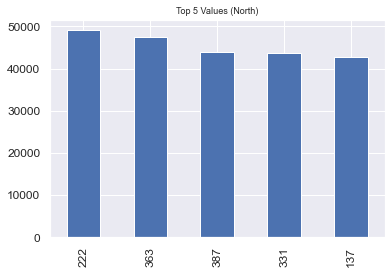

In [8]:
df_north["Sales_Amount"].nlargest(5).plot(kind="bar", title="Top 5 Values (North)")
plt.show()

In [9]:
df_south = df[df["Sales_Area"] == "South"]
df_south["Sales_Amount"].nlargest(5)

386   43593.60
330   41989.60
360   39199.60
359   38570.00
358   37560.00
Name: Sales_Amount, dtype: float64

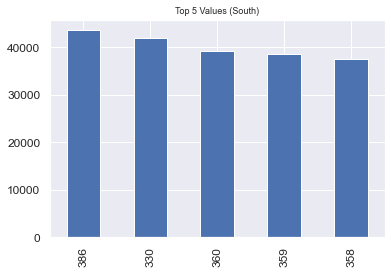

In [10]:
df_south["Sales_Amount"].nlargest(5).plot(kind="bar", title="Top 5 Values (South)")
plt.show()

In [11]:
df_east = df[df["Sales_Area"] == "East"]
df_east["Sales_Amount"].nlargest(5)

138   51531.20
388   45801.00
108   44422.00
61    43184.40
259   43088.20
Name: Sales_Amount, dtype: float64

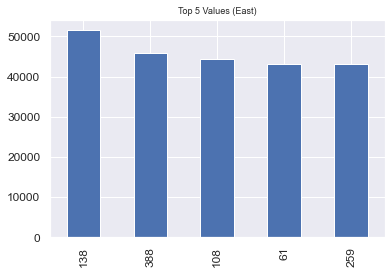

In [12]:
df_east["Sales_Amount"].nlargest(5).plot(kind="bar", title="Top 5 Values (East)")
plt.show()

In [13]:
df_west = df[df["Sales_Area"] == "West"]
df_west["Sales_Amount"].nlargest(5)

33    46716.00
260   43388.10
163   42249.10
60    41429.50
329   41420.70
Name: Sales_Amount, dtype: float64

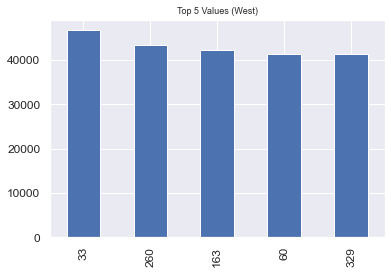

In [14]:
df_west["Sales_Amount"].nlargest(5).plot(kind="bar", title="Top 5 Values (West)")
plt.show()

In each sheet, add the salespeople’s names as headings at the top right. For the first salesperson in each sheet, use SUMIF to calculate their sales total. Use dollar signs in the formula so that you can copy the formula to the right. 

In [15]:
df_north.groupby("Employee")["Sales_Amount"].sum()

Employee
Charlotte Edwards   335128.90
Chloe Fusaro        517004.60
David Wilkinson     289580.80
Jonah Seitz         439469.90
Sarah Gibbs         364649.00
Name: Sales_Amount, dtype: float64

In [16]:
df_south.groupby("Employee")["Sales_Amount"].sum()

Employee
Annabel Mettick   482889.00
Cory Goodwin      323152.30
Emily Whelan      331096.80
Jason Jackaki     285253.10
Olivia Cheung     390105.10
Name: Sales_Amount, dtype: float64

In [17]:
df_east.groupby("Employee")["Sales_Amount"].sum()

Employee
Ashley Almanza    368364.80
Bryan Maldonado   227895.80
Derek Godwin      371911.90
Gordon Beswick    310854.50
Reza Jafari       526806.60
Name: Sales_Amount, dtype: float64

In [18]:
df_west.groupby("Employee")["Sales_Amount"].sum()

Employee
Ally Bryant       423881.00
Josh Sutherland   406452.50
Nina McDonald     270631.90
Spencer Cruz      388246.60
Tia Cruise        233175.90
Name: Sales_Amount, dtype: float64

### Copy of All Sales sheet

Copy the All Sales sheet. Rename it Copy of All Sales. Clear all formatting from the titles. Make the data into a table with the Total Row feature turned on. Add totals in the Sales Amount and Commission columns. Name the table Sales_Data and format it with the style feature. Add the Over/Under column. Create a formula using table references to calculate this. Change the formatting so that the results are displayed as currency, with negative values in red. 

In [19]:
copy_of_all_sales = df.copy()

In [20]:
copy_of_all_sales

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth
0,2021-01-01,Reza Jafari,Reza,Jafari,East,2954.70,Cash,15000,0.00,1
1,2021-01-01,Olivia Cheung,Olivia,Cheung,South,3008.40,Cash,15000,0.00,1
2,2021-01-01,Bryan Maldonado,Bryan,Maldonado,East,6796.80,Credit Card,15000,0.00,1
3,2021-01-01,Nina McDonald,Nina,McDonald,West,6945.40,On Account,15000,0.00,1
4,2021-01-01,Jason Jackaki,Jason,Jackaki,South,7221.60,On Account,15000,0.00,1
...,...,...,...,...,...,...,...,...,...,...
384,2021-12-01,Gordon Beswick,Gordon,Beswick,East,31970.80,Credit Card,15000,3197.08,12
385,2021-12-01,Ashley Almanza,Ashley,Almanza,East,41520.00,Credit Card,15000,4152.00,12
386,2021-12-01,Olivia Cheung,Olivia,Cheung,South,43593.60,Cash,15000,4359.36,12
387,2021-12-01,Jonah Seitz,Jonah,Seitz,North,43974.00,Credit Card,15000,4397.40,12


In [21]:
copy_of_all_sales["Over/Under"] = copy_of_all_sales["Sales_Amount"] - copy_of_all_sales["Targets"]

In [22]:
copy_of_all_sales

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth,Over/Under
0,2021-01-01,Reza Jafari,Reza,Jafari,East,2954.70,Cash,15000,0.00,1,-12045.30
1,2021-01-01,Olivia Cheung,Olivia,Cheung,South,3008.40,Cash,15000,0.00,1,-11991.60
2,2021-01-01,Bryan Maldonado,Bryan,Maldonado,East,6796.80,Credit Card,15000,0.00,1,-8203.20
3,2021-01-01,Nina McDonald,Nina,McDonald,West,6945.40,On Account,15000,0.00,1,-8054.60
4,2021-01-01,Jason Jackaki,Jason,Jackaki,South,7221.60,On Account,15000,0.00,1,-7778.40
...,...,...,...,...,...,...,...,...,...,...,...
384,2021-12-01,Gordon Beswick,Gordon,Beswick,East,31970.80,Credit Card,15000,3197.08,12,16970.80
385,2021-12-01,Ashley Almanza,Ashley,Almanza,East,41520.00,Credit Card,15000,4152.00,12,26520.00
386,2021-12-01,Olivia Cheung,Olivia,Cheung,South,43593.60,Cash,15000,4359.36,12,28593.60
387,2021-12-01,Jonah Seitz,Jonah,Seitz,North,43974.00,Credit Card,15000,4397.40,12,28974.00


In [23]:
copy_of_all_sales.to_csv("sales.csv", index=False)

In [24]:
def red_font_negatives(series):
    highlight = 'color: red;'
    default = ''
    return [highlight if e < 0 else default for e in series]
        

In [25]:
copy_of_all_sales.style.apply(red_font_negatives, axis=1, subset=["Over/Under"])

,Month,Employee,First_Name,Last_Name,Sales_Area,Sales_Amount,Payment_Type,Targets,Commission,Mth,Over/Under
0,2021-01-01 00:00:00,Reza Jafari,Reza,Jafari,East,2954.700000,Cash,15000,0.000000,1,-12045.300000
1,2021-01-01 00:00:00,Olivia Cheung,Olivia,Cheung,South,3008.400000,Cash,15000,0.000000,1,-11991.600000
2,2021-01-01 00:00:00,Bryan Maldonado,Bryan,Maldonado,East,6796.800000,Credit Card,15000,0.000000,1,-8203.200000
3,2021-01-01 00:00:00,Nina McDonald,Nina,McDonald,West,6945.400000,On Account,15000,0.000000,1,-8054.600000
4,2021-01-01 00:00:00,Jason Jackaki,Jason,Jackaki,South,7221.600000,On Account,15000,0.000000,1,-7778.400000
5,2021-01-01 00:00:00,Nina McDonald,Nina,McDonald,West,7658.200000,On Account,15000,0.000000,1,-7341.800000
6,2021-01-01 00:00:00,Ally Bryant,Ally,Bryant,West,7658.600000,Cash,15000,0.000000,1,-7341.400000
7,2021-01-01 00:00:00,Bryan Maldonado,Bryan,Maldonado,East,8188.000000,On Account,15000,0.000000,1,-6812.000000
8,2021-01-01 00:00:00,Reza Jafari,Reza,Jafari,East,9058.400000,Credit Card,15000,0.000000,1,-5941.600000
9,2021-01-01 00:00:00,Josh Sutherland,Josh,Sutherland,West,9098.600000,On Account,15000,0.000000,1,-5901.400000


### Chart sheet

In [26]:
chart = copy_of_all_sales.groupby(["Sales_Area"])["Sales_Amount",'Commission'].sum()
chart

,Sales_Amount,Commission
Sales_Area,,
East,1805833.60,147698.53
North,1945833.20,157168.13
South,1812496.30,138552.42
West,1722387.90,128660.96


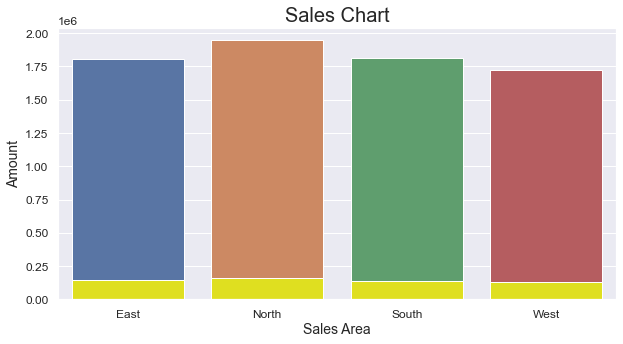

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(x=chart.index, y=chart.Sales_Amount, data=chart)
sns.barplot(x=chart.index, y=chart.Commission, data=chart, color='yellow')
plt.title("Sales Chart", size=20)
plt.xlabel("Sales Area")
plt.ylabel("Amount")
plt.show()

### Sales Analysis sheet 

Position the cursor in the Sales_Data Table and insert a Pivot Table in a new worksheet. Rename that worksheet Sales Analysis. Design a PivotTable that show the sales totals broken down by month and formatted as currency. Have a second set of totals visible as a percentage of the grand total. Set up the PivotTable so that the whole table can be filtered by payment type. (Tip: if you add the heading month to the appropriate box in the PivotTable pane, it will probably be visible as two entries. You can remove one to leave just a list of unique month names.)  

Change the style of the PivotTable and reword the headings to match the sample. Add the Sales Area and Employee slicers to the sheet. Format them so that they stand out. 

In [28]:
copy_of_all_sales.columns

Index(['Month', 'Employee', 'First_Name', 'Last_Name', 'Sales_Area', 'Sales_Amount', 'Payment_Type', 'Targets', 'Commission', 'Mth', 'Over/Under'], dtype='object')

In [29]:
pt = pd.pivot_table(data=copy_of_all_sales, index='Mth', aggfunc='sum')

In [30]:
pt

,Commission,Over/Under,Sales_Amount,Targets
Mth,,,,
1,44479.07,74500.20,584500.20,510000
2,42654.29,99336.40,519336.40,420000
3,59818.17,144269.00,849269.00,705000
4,52671.23,180620.60,630620.60,450000
5,42785.44,139485.80,514485.80,375000
6,31365.19,49936.80,424936.80,375000
7,45689.84,85622.90,595622.90,510000
8,50338.96,90578.60,660578.60,570000
9,48951.40,110805.00,635805.00,525000


In [31]:
pt.drop(["Commission","Over/Under","Targets"], axis=1, inplace=True)

In [32]:
pt["Sales_Amount"].sum()

7286551.0

In [33]:
pt["% of Grand Total"] = pt["Sales_Amount"] / pt["Sales_Amount"].sum() * 100

In [34]:
pt

,Sales_Amount,% of Grand Total
Mth,,
1,584500.20,8.02
2,519336.40,7.13
3,849269.00,11.66
4,630620.60,8.65
5,514485.80,7.06
6,424936.80,5.83
7,595622.90,8.17
8,660578.60,9.07
9,635805.00,8.73


### New Staff sheet 

Use options in the Data Ribbon to import data from the New Staff CSV file. Load the data. Break the link to the original file. Delete any connections and close any query windows.  

Add in blank columns and by using text function formulas or Flash Fill (as appropriate) fill them with the staff names transformed to match the sample. In one column use a text function to extract the area initials from the column called Payroll ID. Hide columns except for First Name, Last Name and Area Code.  

In [35]:
df2 = pd.read_csv("NewStaff.csv")

In [36]:
df2

,Name,Payroll Code
0,BRITTANY_GAULT,NE12192
1,NICOLE_MAIER,NE11021
2,CLAY_CORBIN,NE10264
3,ASHLEY_DELANGE,NE10305
4,JENNIFER_VAZQUEZ,NE11114
5,MANNY_WEBSTER,NW10414
6,LUKE_REDENBAUGH,NW12041
7,DEBBIE_GODOY,NW11115
8,ELIZABETH_LAMBERT,NW11651
9,JOEL_JONES,NW11838


In [37]:
df2["Name"] = df2["Name"].str.replace("_", " ")

In [38]:
df2.head()

,Name,Payroll Code
0,BRITTANY GAULT,NE12192
1,NICOLE MAIER,NE11021
2,CLAY CORBIN,NE10264
3,ASHLEY DELANGE,NE10305
4,JENNIFER VAZQUEZ,NE11114


In [39]:
df2[["First Name","Last Name"]] = df2["Name"].str.split(expand=True)

In [40]:
df2.head()

,Name,Payroll Code,First Name,Last Name
0,BRITTANY GAULT,NE12192,BRITTANY,GAULT
1,NICOLE MAIER,NE11021,NICOLE,MAIER
2,CLAY CORBIN,NE10264,CLAY,CORBIN
3,ASHLEY DELANGE,NE10305,ASHLEY,DELANGE
4,JENNIFER VAZQUEZ,NE11114,JENNIFER,VAZQUEZ


In [41]:
df2["Area"] = df2["Payroll Code"].str.strip('0123456789')

In [42]:
df2.head()

,Name,Payroll Code,First Name,Last Name,Area
0,BRITTANY GAULT,NE12192,BRITTANY,GAULT,NE
1,NICOLE MAIER,NE11021,NICOLE,MAIER,NE
2,CLAY CORBIN,NE10264,CLAY,CORBIN,NE
3,ASHLEY DELANGE,NE10305,ASHLEY,DELANGE,NE
4,JENNIFER VAZQUEZ,NE11114,JENNIFER,VAZQUEZ,NE


In [43]:
df2["First Name"] = df2["First Name"].str.capitalize()

In [44]:
df2["Last Name"] = df2["Last Name"].str.capitalize()

In [45]:
df2.drop(["Name","Payroll Code"], axis=1, inplace=True)

In [46]:
df2

,First Name,Last Name,Area
0,Brittany,Gault,NE
1,Nicole,Maier,NE
2,Clay,Corbin,NE
3,Ashley,Delange,NE
4,Jennifer,Vazquez,NE
5,Manny,Webster,NW
6,Luke,Redenbaugh,NW
7,Debbie,Godoy,NW
8,Elizabeth,Lambert,NW
9,Joel,Jones,NW


### Cover Page sheet 

In [47]:
idx = pd.MultiIndex.from_product([["Contents"],['All Sales', 'Team Results', 'Chart','Sales Analysis','New Staff']], names=[' ', ' '])

In [48]:
col = ["North","South","East","West"]

In [49]:
coverpage = pd.DataFrame(index=idx, columns=col, data=" ")

In [50]:
coverpage

North South East West
                                             
Contents All Sales                           
         Team Results                        
         Chart                               
         Sales Analysis                      
         New Staff

#### Python code done by Dennis Lam